<a href="https://colab.research.google.com/github/rish1710/ml-assignments/blob/main/ml_07_rishit_mahesh_d084.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Perform SVM using soft margin SVC, Kernels and improve the accuracies using hyperparameter tuning. Compare the results with and without dimensionality reduction using PCA.**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
X,y=make_classification(n_samples=5000,n_features=10,n_classes=3,n_clusters_per_class=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [ ]:
lsvc = LinearSVC(verbose=0)
print(lsvc)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='12', random_state=None, tol=0.0001,
          verbose=0)

LinearSVC()


LinearSVC(dual=True, penalty='12')

In [ ]:
lsvc.fit(X_train, y_train)
score = lsvc.score(X_train, y_train)
print("Score : ",score)

Score :  0.9183529411764706


In [ ]:
cv_scores = cross_val_score(lsvc, X_train, y_train, cv=10)
print("CV average score : %.2f"%cv_scores.mean())

CV average score : 0.92


In [ ]:
y_pred = lsvc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[242   0  11]
 [ 29 211  19]
 [  3   3 232]]


In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       253
           1       0.99      0.81      0.89       259
           2       0.89      0.97      0.93       238

    accuracy                           0.91       750
   macro avg       0.92      0.92      0.91       750
weighted avg       0.92      0.91      0.91       750



In [ ]:
print("Iris dataset classification with SVC")

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

Iris dataset classification with SVC


In [ ]:
lsvc = LinearSVC(verbose=0)
print(lsvc)

lsvc.fit(X_train, y_train)
score = lsvc.score(X_train, y_train)
print("Score : ",score)

cv_scores = cross_val_score(lsvc, X_train, y_train, cv=10)
print("CV average score : %.2f"%cv_scores.mean())

y_pred = lsvc.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

LinearSVC()
Score :  0.968503937007874
CV average score : 0.96
[[7 0 0]
 [0 9 2]
 [0 0 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.82      0.90        11
           2       0.71      1.00      0.83         5

    accuracy                           0.91        23
   macro avg       0.90      0.94      0.91        23
weighted avg       0.94      0.91      0.92        23



In [ ]:
from __future__ import division, print_function
import numpy as np
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
def evaluate_on_test_data(model):
    predictions = model.predict(X_test)
    correct_classifications = 0
    for i in range(len(predictions)):
        if predictions[i] == y_test[i]:
            correct_classifications += 1
    accuracy = 100*correct_classifications / len(y_test)
    return accuracy

In [ ]:
kernels = ('linear', 'poly', 'rbf')
accuracies = []
for index, kernel in enumerate(kernels):
    model = svm.SVC(kernel=kernel)
    model.fit(X_train, y_train)
    accuracy = evaluate_on_test_data(model)
    accuracies.append(accuracy)
    print("{} % accuracy obtained with kernel = {}".format(accuracy, kernel))

84.21052631578948 % accuracy obtained with kernel = linear
76.3157894736842 % accuracy obtained with kernel = poly
84.21052631578948 % accuracy obtained with kernel = rbf


In [ ]:
#Train SVMs with different kernels
svc_linear = svm.SVC(kernel='linear').fit(X_train, y_train)
svc_rbf = svm.SVC(kernel='rbf', gamma=0.7).fit(X_train, y_train)
svc_poly = svm.SVC(kernel='poly', degree=3).fit(X_train, y_train)

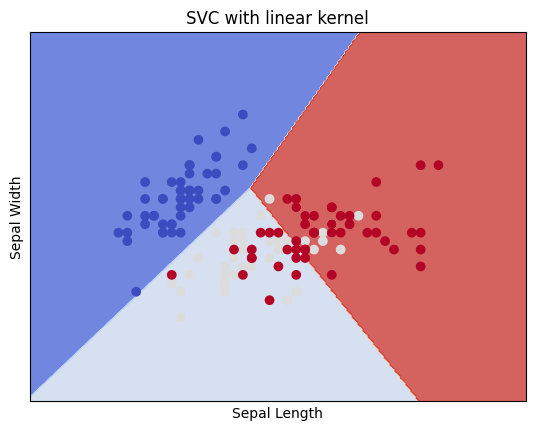

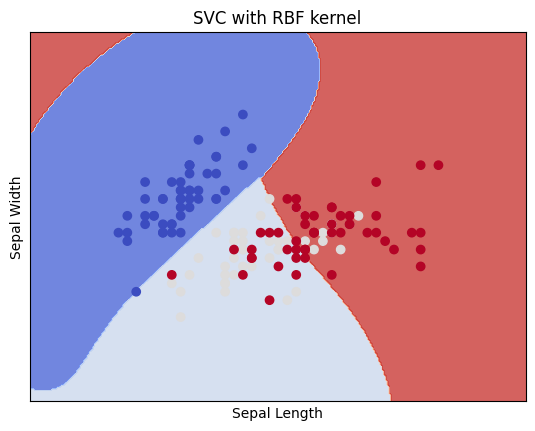

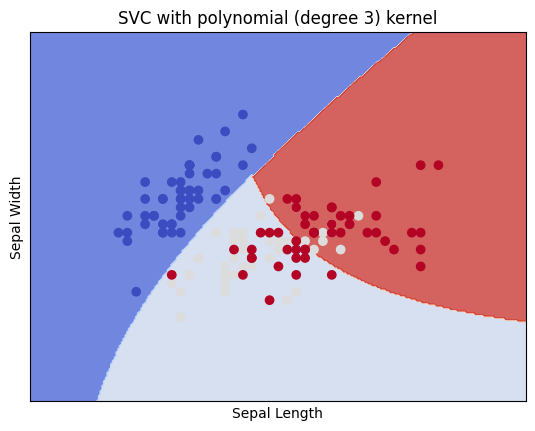

In [ ]:
#Create a mesh to plot in
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

#Define title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for i, clf in enumerate((svc_linear, svc_rbf, svc_poly)):
  # Plot the decision boundary, for that , we will assign a color to each point in the mesh
  # [x_min, x_max]x[y_min, y_max].

  plt.figure(i)

  z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  z = z.reshape(xx.shape)
  plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
  plt.xlabel("Sepal Length")
  plt.ylabel("Sepal Width")
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.title(titles[i])

plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
# Define parameter grids
param_grid_linear = {'C': [0.1, 1, 10, 100]}
param_grid_rbf = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}
param_grid_poly = {'C': [0.1, 1, 10], 'degree': [2, 3, 4], 'gamma': ['scale', 'auto']}

# Apply GridSearchCV
grid_linear = GridSearchCV(SVC(kernel='linear'), param_grid_linear, cv=5)
grid_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid_rbf, cv=5)
grid_poly = GridSearchCV(SVC(kernel='poly'), param_grid_poly, cv=5)

grid_linear.fit(X, y)
grid_rbf.fit(X, y)
grid_poly.fit(X, y)

# Print best parameters
print("Best parameters for linear kernel:", grid_linear.best_params_)
print("Best parameters for RBF kernel:", grid_rbf.best_params_)
print("Best parameters for polynomial kernel:", grid_poly.best_params_)

# Best models
svc_linear = grid_linear.best_estimator_
svc_rbf = grid_rbf.best_estimator_
svc_poly = grid_poly.best_estimator_

Best parameters for linear kernel: {'C': 10}
Best parameters for RBF kernel: {'C': 0.1, 'gamma': 1}
Best parameters for polynomial kernel: {'C': 10, 'degree': 4, 'gamma': 'auto'}


In [ ]:
import warnings
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split

#Load data from https://www.openml.org/d/554

X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
# Initialize SVM classifiers with different kernels
svm_linear = SVC(kernel='linear', random_state=42)
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_poly = SVC(kernel='poly', degree=3, random_state=42)

In [ ]:
# Train the models
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)

In [ ]:
# Predict using the trained models
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)

In [ ]:
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
accuracy_poly = accuracy_score(y_test, y_pred_poly)

In [ ]:
# Print out the accuracy of each model
print(f"Accuracy of Linear SVM: {accuracy_linear:.4f}")
print(f"Accuracy of RBF SVM: {accuracy_rbf:.4f}")
print(f"Accuracy of Polynomial SVM: {accuracy_poly:.4f}")

In [ ]:
# Visualize the results of predictions using a few random test images

def plot_images(images, titles, predictions=None, target=None):
    fig, axes = plt.subplots(1, len(images), figsize=(10, 3))
    for i, ax in enumerate(axes):
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        if predictions is not None:
            ax.set_title(f"Pred: {predictions[i]} | True: {target[i]}")
        else:
            ax.set_title(f"True: {target[i]}")
        ax.axis('off')
    plt.show()